<a href="https://colab.research.google.com/github/kumar-mahendra/Mathematics-and-Algorithms/blob/main/Gradient_Descent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent Method with Example

### **Author : Mahendra Kumar**

## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale                # for normalization
from sklearn.model_selection import train_test_split   # split data as train and test data
from numpy.linalg import norm                          # to find euclidean norm
import matplotlib.pyplot as plt

## Boston Housing Price Prediction

### Load data from UCI repository

In [ ]:

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV']
housing_data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",delimiter="\s+", names=col_names)
# boston_data.head()

In [ ]:

X =  housing_data.iloc[:,:-1]    # Features 
Y =  housing_data.iloc[:, -1]    # Median Housing Prices (Dependent variable)

#### Feature Scaling ( OR Normalization ) 

In [ ]:
# Z-Score Normalization  

# Let x denotes a  feature column then we set  z = (x-mean(x)/variance(x)) as
# scaled feature having 0 mean and 1 standard deviation . 

scaled_housing_data =  scale(X)  # Standardize all Features 

#### Traing-Test split

In [ ]:

X_train, X_test, Y_train, Y_test =  train_test_split( scaled_housing_data , Y, test_size=0.1)

IX_train=np.append(arr=np.ones((len(X_train),1)),values=X_train,axis=1)  # Adding column of 1's to the X_train matrix
IX_test=np.append(arr=np.ones((len(X_test),1)),values=X_test,axis=1)     # Adding column of 1's to the X_test matrix


#### Training the model (Batch GDM)

In [ ]:
np.shape(X_train), np.shape(X_test), np.shape(I),  np.shape(Y_train), np.shape(Y_test)

((455, 13), (51, 13), (14, 14), (455,), (51,))

In [ ]:
# Let initial values be
m,n = len(IX_train[0]), len(IX_train)
epsilon=10**(-8)
Tol = 10**(-6)
MaxIter = 10**4
I = np.eye(m,m)
alpha = 0
# The Gradient Descent Method (GDM) Implementation 

def train_model(IX_train,Y_train,epsilon,Tol,alpha_k,MaxIter) : 

    # initilaize theta
    theta = np.ones((m,1))

    AtA_plus_epsilon = np.dot( IX_train.T , IX_train )  + epsilon*I
    btA = np.dot( Y_train.T , IX_train )
        
    
    for k in range(MaxIter) : 
        
        gradient = np.dot( theta.T , AtA_plus_epsilon ) - np.dot(Y_train.T, IX_train)
        d_k = -gradient.T

        if norm(d_k,ord=2) ==0  : 
            return alpha_k, theta1/(norm(np.dot( IX_train.T , IX_train ),ord='fro')  + epsilon)
                          
        theta_new =  theta + alpha_k * d_k 

        error_theta = norm( theta_new - theta , ord=2) 

        if error_theta < Tol : 
            return alpha_k,theta
            
        alpha_numerator = norm(d_k,ord=2)**2
        alpha_denom =  np.dot( np.dot(d_k.T,AtA_plus_epsilon), d_k)[0,0]
        alpha_k = alpha_numerator/ alpha_denom
      
        theta = theta_new

In [ ]:
alpha,theta = train_model(IX_train,Y_train,epsilon,Tol,0.01,MaxIter)

#### Computation of **theta** using normal equation

In [ ]:
epsilon=10**(-8)
B = np.dot(IX_train.T,IX_train)
[m, m] = B.shape
Theta = np.linalg.solve(B + epsilon*np.eye(m), np.dot(IX_train.T,Y_train)) ## 

#### Calculating Error in **theta** obtained i.e. **|| theta-Theta ||**

---



In [ ]:
Theta = np.reshape(Theta,(len(theta),1))
print("Error : ",np.linalg.norm(np.subtract(Theta,theta)))
print("\nTheta Obtained : \n------------------\n", theta)

Error :  4.3395219167924866e-06

Theta Obtained : 
------------------
 [[ 2.24625852e+01]
 [-1.06935040e+00]
 [ 1.00931042e+00]
 [-5.90467662e-03]
 [ 6.53800045e-01]
 [-1.86905203e+00]
 [ 2.53291765e+00]
 [-1.68760291e-01]
 [-3.11301403e+00]
 [ 3.11746279e+00]
 [-2.38173597e+00]
 [-1.98876558e+00]
 [ 8.40713183e-01]
 [-3.82014692e+00]]


#### Gradient descent by changing the alpha

In [ ]:
alpha = 1/(norm(np.dot( IX_train.T , IX_train ),ord='fro')  + epsilon)
new_alpha=alpha+(4*(10**(-4)))
print(alpha)
print(new_alpha)
alpha,new_theta=train_model(IX_train,Y_train,epsilon, Tol, new_alpha, MaxIter)
print("Error between old and new theta : ",np.linalg.norm(new_theta-theta,ord=2))

0.0003348244503935269
0.000734824450393527
Error between old and new theta :  8.542665024280677e-06


By Changing the alpha to old_alpha+(4x10**-4) , the new solution, i.e., the new_theta converges to the old_theta, i.e., both are almost equal. This makes sense as the gradient descent will finally leads to the unique local minima of loss function

### Testing the model

In [ ]:
Predicted_Y_test=np.dot(IX_test,Theta)

### Ploting

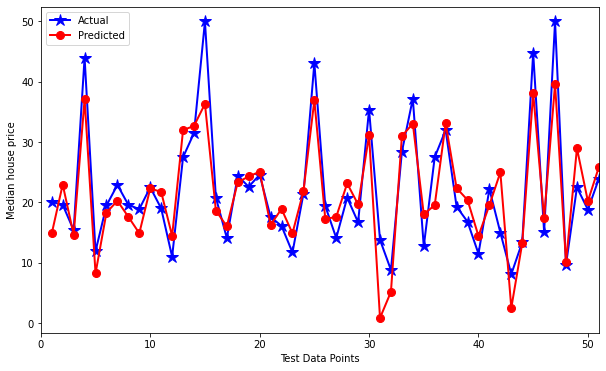

In [ ]:
plt.figure ( figsize=(10,6))
x = np.arange(1,len(Y_test)+1)
plt.plot(x,Y_test, '-*', color='blue',
         markersize=12, linewidth=2,
         markerfacecolor='blue',
         markeredgecolor='blue',
         markeredgewidth=1)
plt.plot(x,Predicted_Y_test, '-o', color='red',
         markersize=8, linewidth=2,
         markerfacecolor='red',
         markeredgecolor='red',
         markeredgewidth=1)
plt.xlim([ 0, len(Y_test)])
plt.xlabel("Test Data Points")
plt.ylabel("Median house price")
plt.legend({'Predicted','Actual'})